# EJERCICIO 4 (CAPÍTULO 6 EJERCICIO 10)

## (a)

In [9]:
set.seed(19)  # Some randomization in the setup.
p = 20
n = 1000
X = matrix(rnorm(p * n), ncol = p, nrow = n)
beta = rnorm(p, sd = 1)
num_rand_zeroes = sample(0:p/4)
rand_zeroes = sample(seq(1, length(beta)), num_rand_zeroes, replace = F)
beta[rand_zeroes] = 0
e = rnorm(n)
Y = as.vector(X * beta + e)

## (b)

In [10]:
n_training = 100
train = sample(1:nrow(X), n_training_observations)
test = (-train)

X.train = X[train]
Y.train = Y[train]
X.test  = X[test ]
Y.test  = Y[test ]

df.train = data.frame(y = Y.train, x = X.train)
df.test  = data.frame(y = Y.test,  x = X.test)

## (c)

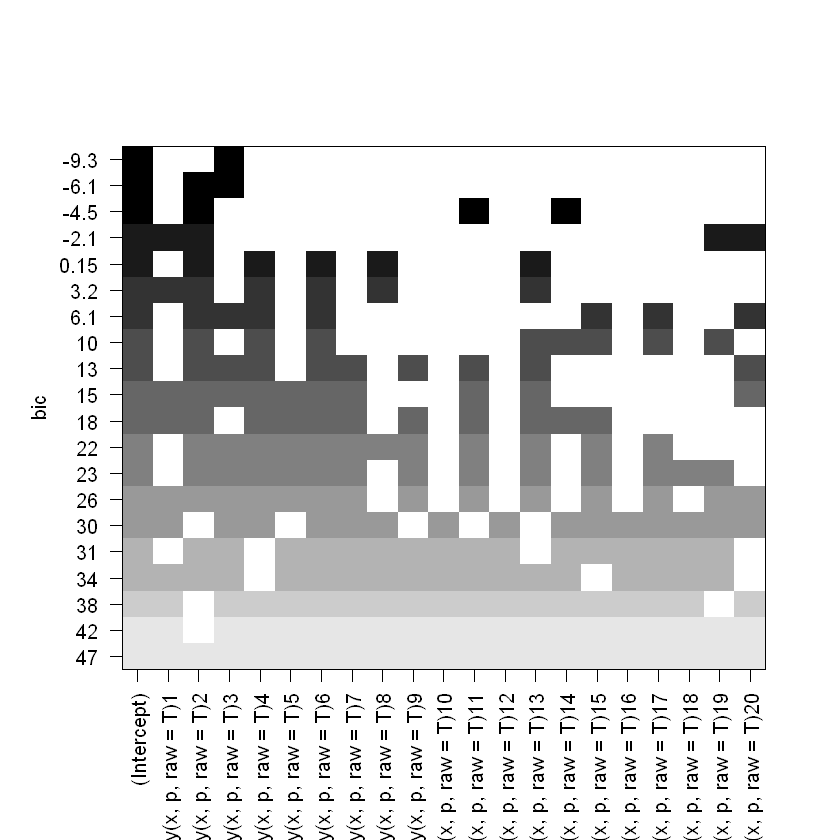

In [12]:
library(leaps)
fit = regsubsets(y ~ poly(x, p, raw = T), data = df.train, nvmax = p)
plot(fit)

## (d)

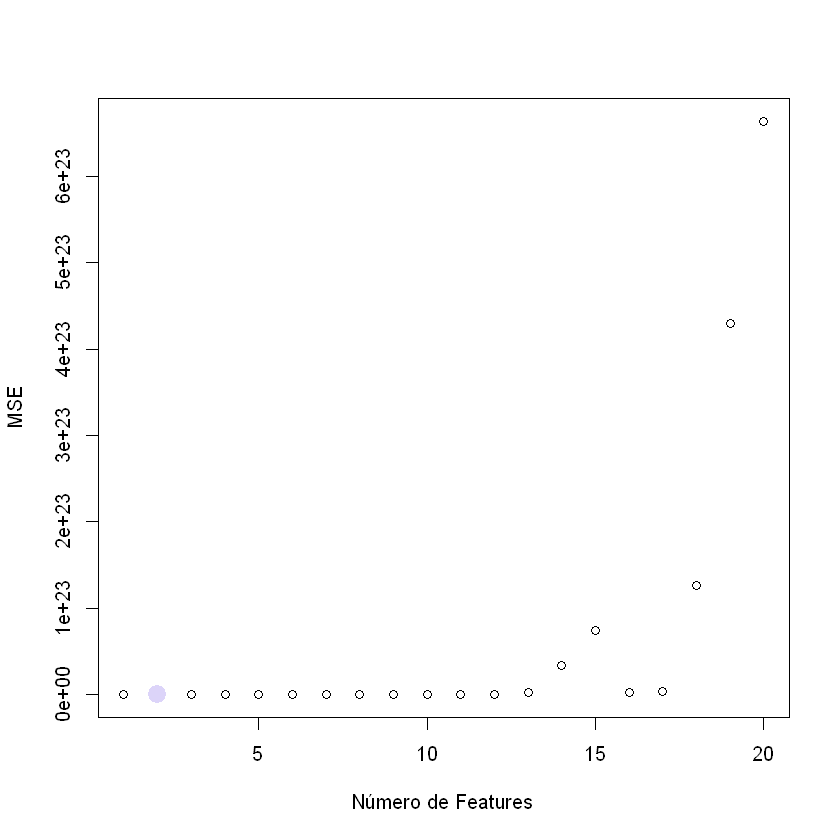

In [17]:
mse = function(prediction, real) {
  mean((prediction - real)^2)   
}

predict_regsubsets = function(obj, newdata, id) {
form   = as.formula(obj$call[[2]]) # Extract formula.
matrix = model.matrix(form, newdata)
coefic = coef(obj, id = id)
xvars  = names(coefic)
matrix[, xvars] * coefic
}

test.mse = sapply(1:p, function(id) {
prediction = predict_regsubsets(fit, df.test, id)
mse(prediction, Y.test)
})

plot(seq(1:p), test.mse, xlab = 'Número de Features', ylab = 'MSE')
points(which.min(test.mse), test.mse[which.min(test.mse)], col = '#dcd4f9', cex = 3, pch = 20)

## (e)

El mínimo es 2.

## (f)

Cuando empezamos a incluir features "ruidosos" (que sus betas son 0), el error de prueba se incrementa. 

## (g)

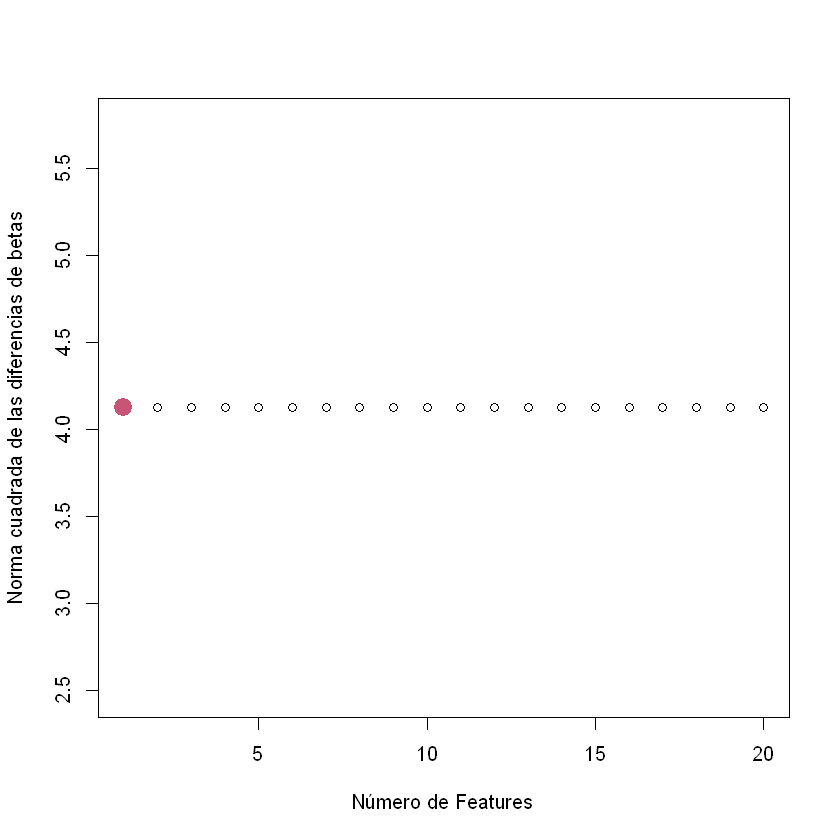

In [16]:
rsqdiffs = sapply(1:p, function(r) {
  coefics    = coef(fit, id = r)
  coef_names = names(coefics)
  beta.est   = sapply(1:p, function(i) {
    id = sprintf('Feature #%d', i)
    if (id %in% coef_names) {
      return(coefics[id])
    } else return(0)
  })
  return(sqrt( sum((beta - beta.est)^2)) )
})

plot(seq(1:p), rsqdiffs, xlab = 'Número de Features', ylab = 'Norma cuadrada de las diferencias de betas')
points(which.min(rsqdiffs), rsqdiffs[which.min(rsqdiffs)], col = '#c95576', cex = 3, pch = p)

Es casi que constante